# **Project Name**    - FBI Crime Investigation Project



##### **Project Type**    - Regression
##### **Contribution**    - Individual
 Keshav Yadav


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore') 

### Dataset Loading

In [2]:
# Load Dataset
df= pd.read_excel("..\Datasets\Train.xlsx")

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Total Number of Rows: {df.shape[0]} \nTotal Number of Columns: {df.shape[1]}")

Total Number of Rows: 474565 
Total Number of Columns: 13


### Dataset Information

In [5]:
# Dataset Info
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f"Numbers of Duplicate Value: {df.duplicated().sum()} out of {len(df)}")

Numbers of Duplicate Value: 44618 out of 474565


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print("Checking for Missing Values")
df.isnull().sum()

--- Checking for Missing Values ---


TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

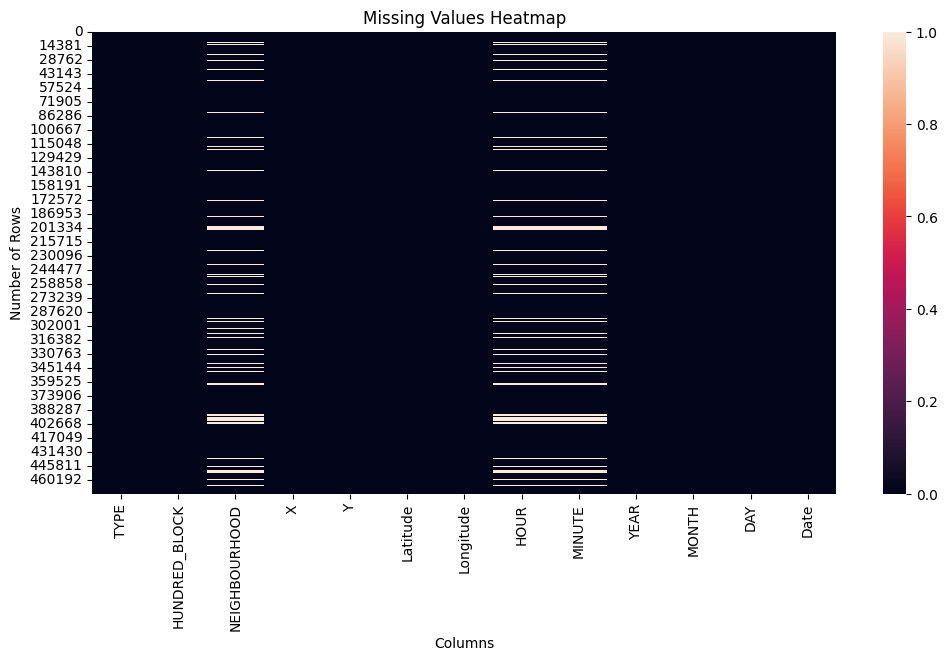

In [8]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Number of Rows')
plt.show()

### What did you know about your dataset?

So my train data have 474565 Rows and 13 columns: `TYPE`, `HUNDRED_BLOCK`, `NEIGHBOURHOOD`,`X`, `Y`, `Latitude`, `Longitude`, `HOUR`, `MINUTE`, `YEAR`, `MONTH`, `DAY`, `Date` and in some columns like `HUNDRED_BLOCK`, `NEIGHBOURHOOD`, `HOUR` , `MINUTE` there are some missing values


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
for var in df.columns: # using for loop to print all the columns in the dataset
    print(f"{var}: {df[var].dtype}")

TYPE: object
HUNDRED_BLOCK: object
NEIGHBOURHOOD: object
X: float64
Y: float64
Latitude: float64
Longitude: float64
HOUR: float64
MINUTE: float64
YEAR: int64
MONTH: int64
DAY: int64
Date: datetime64[ns]


In [10]:
# Dataset Describe
df.describe() # summary statistics of the dataset

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

for var in df.columns: # usning for loop to get unique values in each column
    print(f"Unique values for {var}: {df[var].nunique()}") 

Unique values for TYPE: 9
Unique values for HUNDRED_BLOCK: 20566
Unique values for NEIGHBOURHOOD: 24
Unique values for X: 84225
Unique values for Y: 82768
Unique values for Latitude: 89488
Unique values for Longitude: 87190
Unique values for HOUR: 24
Unique values for MINUTE: 60
Unique values for YEAR: 13
Unique values for MONTH: 12
Unique values for DAY: 31
Unique values for Date: 4748


## ***3. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [12]:
# Handling Missing Values & Missing Value Imputation

print(f"Numbers of Duplicate Value: {df.duplicated().sum()} out of {len(df)}")
print(f"Removed {df.duplicated().sum()} duplicate rows.")
df.drop_duplicates(inplace=True)
print(f"Numbers of Duplicate Value after removal: {df.duplicated().sum()} out of {len(df)}")

Numbers of Duplicate Value: 44618 out of 474565
Removed 44618 duplicate rows.
Numbers of Duplicate Value after removal: 0 out of 429947


In [13]:
missing_values = df.isnull().sum()
print("Missing values before handling")
print(missing_values[missing_values > 0])

# For numerical missing values(HOUR, MINUTE) with their median
# Identify numerical columns with missing values
numerical_cols_to_impute = ['HOUR', 'MINUTE']

for col in numerical_cols_to_impute:
    if col in df.columns and df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled missing values in numerical column '{col}' with median: {median_val}")
    else:
        print(f"Column '{col}' not found or has no missing values to impute numerically.")
        
# For categorical missing values(HUNDRED_BLOCK, NEIGHBOURHOOD) with their mode
# Identify categorical columns with missing values
categorical_cols_to_impute = ['HUNDRED_BLOCK', 'NEIGHBOURHOOD'] 

for col in categorical_cols_to_impute:
    if col in df.columns and df[col].isnull().any():
        mode_val = df[col].mode()[0] # .mode()[0] is used because mode() can return multiple values if there's a tie
        df[col] = df[col].fillna(mode_val)
        print(f"Filled missing values in categorical column '{col}' with mode: '{mode_val}'")
    else:
        print(f"Column '{col}' not found or has no missing values to impute categorically.")

Missing values before handling
HUNDRED_BLOCK      13
NEIGHBOURHOOD    6873
HOUR             4747
MINUTE           4747
dtype: int64
Filled missing values in numerical column 'HOUR' with median: 15.0
Filled missing values in numerical column 'MINUTE' with median: 10.0
Filled missing values in categorical column 'HUNDRED_BLOCK' with mode: 'OFFSET TO PROTECT PRIVACY'
Filled missing values in categorical column 'NEIGHBOURHOOD' with mode: 'Central Business District'


In [14]:
verify_missing_values = df.isnull().sum()
if verify_missing_values.sum() == 0:
    print("\nAll missing values handled.")
else:
    print("\nRemaining missing values after handling:")
    print(verify_missing_values[verify_missing_values > 0])

print("\nUpdated DataFrame info after missing value handling:")
verify_missing_values


All missing values handled.

Updated DataFrame info after missing value handling:


TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I fill all the missing values for numerical missing values `HOUR`, `MINUTE` with their median and for categorical missing values `HUNDRED_BLOCK`, `NEIGHBOURHOOD` with their mode

### 2. Handling Outliers

In [15]:
# Handling Outliers & Outlier treatments
print("Original descriptive statistics for numerical columns (before outlier treatment):")
print(df[['X', 'Y', 'Latitude', 'Longitude']].describe())

Original descriptive statistics for numerical columns (before outlier treatment):
                   X             Y       Latitude      Longitude
count  429947.000000  4.299470e+05  429947.000000  429947.000000
mean   486795.957331  5.396384e+06      48.718479    -121.747578
std     51508.665577  5.701912e+05       5.147678      12.863990
min         0.000000  0.000000e+00       0.000000    -124.549757
25%    490519.870000  5.454950e+06      49.247273    -123.129406
50%    491714.780000  5.457145e+06      49.266987    -123.112944
75%    494084.690000  5.458710e+06      49.281122    -123.078155
max    511303.000000  5.512579e+06      49.755314       0.000000


In [16]:
def cap_outliers_iqr(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

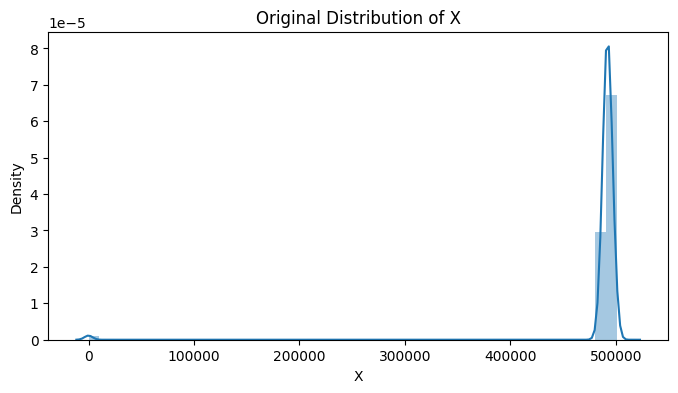

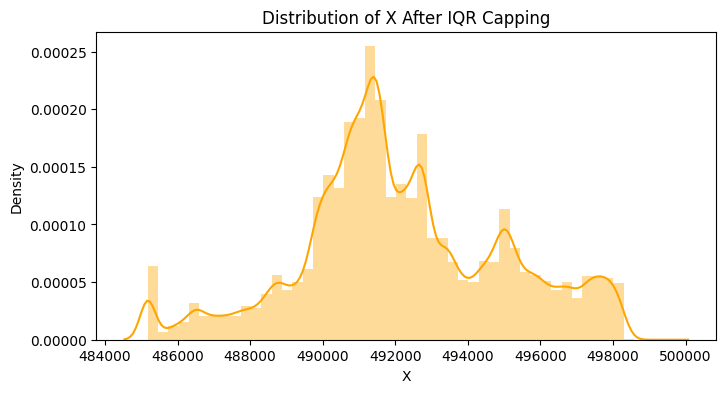

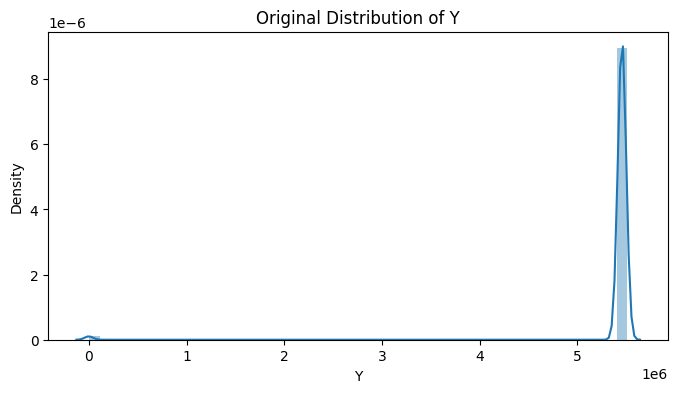

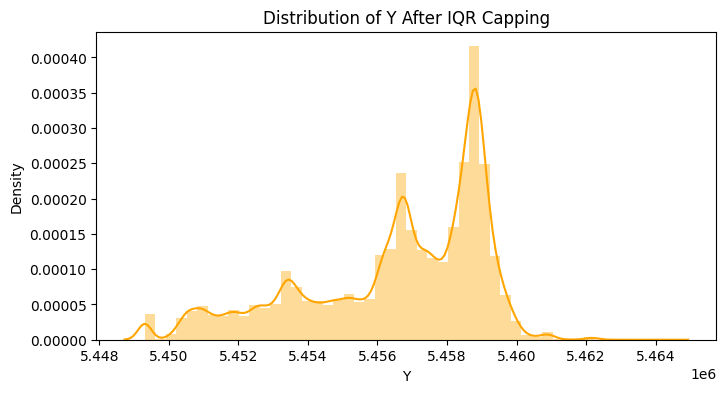

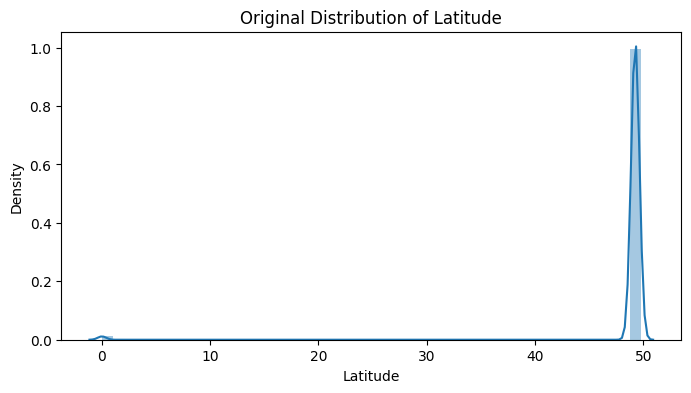

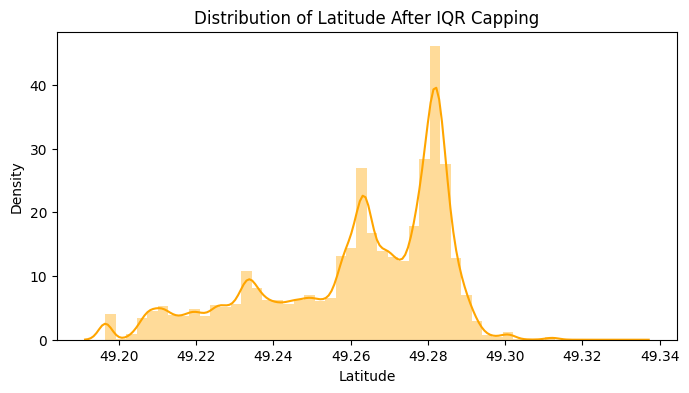

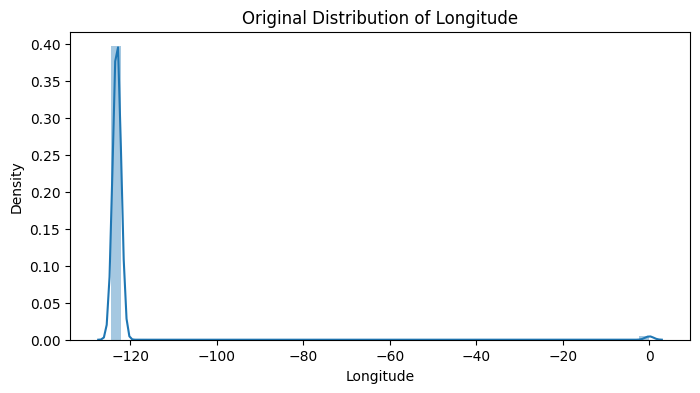

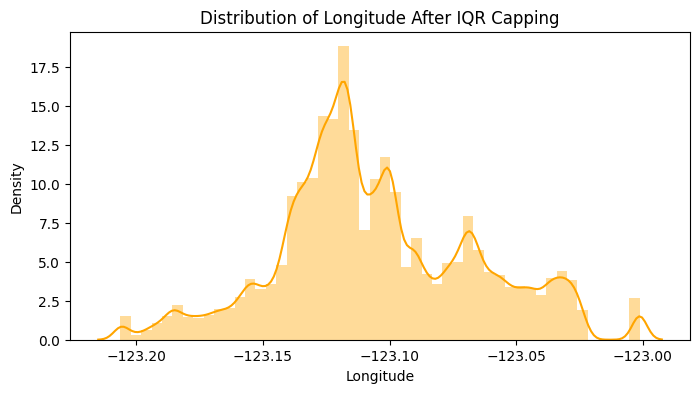

In [17]:
numerical_cols_for_outlier = ['X', 'Y', 'Latitude', 'Longitude']

for col in numerical_cols_for_outlier:
    # Plot original distribution to visualize outliers
    plt.figure(figsize=(8, 4))
    sns.distplot(df[col], kde=True)
    plt.title(f'Original Distribution of {col}')
    plt.show()

    df[col] = cap_outliers_iqr(df[col])

    # Plot distribution after capping
    plt.figure(figsize=(8, 4))
    sns.distplot(df[col], kde=True, color='orange')
    plt.title(f'Distribution of {col} After IQR Capping')
    plt.show()

In [18]:
print("Original descriptive statistics for numerical columns (before outlier treatment):")
print(df[['X', 'Y', 'Latitude', 'Longitude']].describe())

Original descriptive statistics for numerical columns (before outlier treatment):
                   X             Y       Latitude      Longitude
count  429947.000000  4.299470e+05  429947.000000  429947.000000
mean   492155.472529  5.456549e+06      49.261652    -123.105597
std      2834.942441  2.608355e+03       0.023460       0.039237
min    485172.640000  5.449311e+06      49.196499    -123.206282
25%    490519.870000  5.454950e+06      49.247273    -123.129406
50%    491714.780000  5.457145e+06      49.266987    -123.112944
75%    494084.690000  5.458710e+06      49.281122    -123.078155
max    499431.920000  5.464349e+06      49.331895    -123.001279


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used IQR (Interquartile Range) Method. This method was chosen because it's good at handling numbers that are very far from the rest without being overly affected by them. It works by setting a upper and lower limit for the numbers. Any number that falls outside the limits is then changed to be at the limit rather than being removed entirely by using this you keep all your data which can be important while still making sure very extreme numbers don't mess up your analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

In [68]:
train_df = df.copy()

train_df['YEAR'] = train_df['Date'].dt.year
train_df['MONTH'] = train_df['Date'].dt.month

train_df = train_df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incident Counts')
    
print(train_df.head().to_markdown(index=False))


|   YEAR |   MONTH | TYPE                              |   Incident Counts |
|-------:|--------:|:----------------------------------|------------------:|
|   1999 |       1 | Break and Enter Commercial        |               303 |
|   1999 |       1 | Break and Enter Residential/Other |               644 |
|   1999 |       1 | Mischief                          |               551 |
|   1999 |       1 | Offence Against a Person          |                31 |
|   1999 |       1 | Other Theft                       |               247 |


##### Which all features you found important and why?


When I analyzed the test data that provided to us. I found that the test data does not have all columns that are present in the train data so I just selected only those columns that are present in both datasets. After that I groups the training data by year, month, and type. Then i counts the number of incidents for each unique combination and stores these counts in a new column named 'Incident Counts'.

#### 2. Feature Manipulation

In [60]:
train_df['MONTH_sin'] = np.sin(2 * np.pi * train_df['MONTH'] / 12)
train_df['MONTH_cos'] = np.cos(2 * np.pi * train_df['MONTH'] / 12)
train_df = train_df.drop('MONTH', axis=1)

print(train_df.head().to_markdown(index=False))

|   YEAR | TYPE                              |   Incident Counts |   MONTH_sin |   MONTH_cos |
|-------:|:----------------------------------|------------------:|------------:|------------:|
|   1999 | Break and Enter Commercial        |               303 |         0.5 |    0.866025 |
|   1999 | Break and Enter Residential/Other |               644 |         0.5 |    0.866025 |
|   1999 | Mischief                          |               551 |         0.5 |    0.866025 |
|   1999 | Offence Against a Person          |                31 |         0.5 |    0.866025 |
|   1999 | Other Theft                       |               247 |         0.5 |    0.866025 |


Encode the 'MONTH' as sine and cosine values which helps the model to understand the months cycle like a circle instead of being a straight line. This is important because it correctly shows that December is close to January not far away beacause of this the model can learn better and predict seasonal patterns in the crime data.

and after encoding the 'MONTH' as sine and cosine values i just drop the 'MONTH' column from the data because it is no longer needed.

#### 3. Data Splitting

In [61]:
split_year = 2009

X_train = train_df[train_df['YEAR'] <= split_year].drop(['Incident Counts'], axis=1)
y_train = train_df[train_df['YEAR'] <= split_year]['Incident Counts']

X_test = train_df[train_df['YEAR'] > split_year].drop(['Incident Counts'], axis=1)
y_test = train_df[train_df['YEAR'] > split_year]['Incident Counts']

print("Chronological Data Splitting complete.")
print(f"X_train_chrono shape: {X_train.shape}")
print(f"X_test_chrono shape: {X_test.shape}")
print(f"y_train_chrono shape: {y_train.shape}")
print(f"y_test_chrono shape: {y_test.shape}")

Chronological Data Splitting complete.
X_train_chrono shape: (1188, 4)
X_test_chrono shape: (216, 4)
y_train_chrono shape: (1188,)
y_test_chrono shape: (216,)


Then I splits my crime data into two main parts based on the year 2009. Data from 1999 to 2009 becomes the training set on which the model learns and Data from after 2009 becomes the test set which is used to check how well the model predicts on unseen incidents. I also separates the 'Incident Counts' column for Y_test and Y_train.

#### 4. Categorical Encoding

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[('tnf1',OneHotEncoder(sparse_output=False),['TYPE'])],remainder='passthrough')

In [63]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

## ***5. ML Model Implementation***

### Random Forest Regressor Model

In [64]:
# Training Random Forest Regressor Model
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_features': [0.6, 0.8, 1.0], 
    'min_samples_leaf': [1, 2, 4],   
    'min_samples_split': [2, 5, 10]  
}

tscv = TimeSeriesSplit(n_splits=5) 


rf_model_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=tscv,  
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    verbose=2 
)


rf_model_grid_search.fit(X_train, y_train)
print("GridSearchCV complete.")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV complete.


In [65]:
best_params = rf_model_grid_search.best_params_
best_rf_model = rf_model_grid_search.best_estimator_

print("\nBest Hyperparameters found for Random Forest using TimeSeriesSplit:")
print(best_params)


Best Hyperparameters found for Random Forest using TimeSeriesSplit:
{'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [66]:
best_rf_model_y_pred = best_rf_model.predict(X_test)

best_rf_model_mae = mean_absolute_error(y_test, best_rf_model_y_pred)
best_rf_model_rmse = np.sqrt(mean_squared_error(y_test, best_rf_model_y_pred))
best_rf_model_r2 = r2_score(y_test, best_rf_model_y_pred)

print("Performance of Tuned Random Forest Regressor")
print(f"Mean Absolute Error (MAE): {best_rf_model_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {best_rf_model_rmse:.2f}")
print(f"R-squared (R2): {best_rf_model_r2:.2f}")

Performance of Tuned Random Forest Regressor
Mean Absolute Error (MAE): 52.16
Root Mean Squared Error (RMSE): 88.48
R-squared (R2): 0.87


### XGBOOST Regressor Model

In [42]:
import xgboost as xgb


param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],        
    'subsample': [0.7, 0.8, 0.9],   
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]          
}

tscv_xgb = TimeSeriesSplit(n_splits=5)


XGB_model_grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(random_state=42, n_jobs=-1, eval_metric='rmse', objective='reg:squarederror'),
    param_grid=param_grid_xgb,
    cv=tscv_xgb,  
    scoring='neg_mean_squared_error', 
)


print("Starting GridSearchCV for XGBoost with TimeSeriesSplit...")
XGB_model_grid_search.fit(X_train, y_train)
print("GridSearchCV complete for XGBoost.")

# 5. Get the best parameters and best estimator for XGBoost
best_params_xgb = XGB_model_grid_search.best_params_
best_xgboost_model = XGB_model_grid_search.best_estimator_

print("\nBest Hyperparameters found for XGBoost using TimeSeriesSplit:")
print(best_params_xgb)


Starting GridSearchCV for XGBoost with TimeSeriesSplit...
GridSearchCV complete for XGBoost.

Best Hyperparameters found for XGBoost using TimeSeriesSplit:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.9}


In [45]:
best_xgboost_model_y_pred = best_xgboost_model.predict(X_test)

best_xgboost_model_mae = mean_absolute_error(y_test, best_xgboost_model_y_pred)
best_xgboost_model_rmse = np.sqrt(mean_squared_error(y_test, best_xgboost_model_y_pred))
best_xgboost_model_r2 = r2_score(y_test, best_xgboost_model_y_pred)

print("\n--- Performance of Tuned XGBoost Regressor (TimeSeriesSplit) ---")
print(f"Mean Absolute Error (MAE): {best_xgboost_model_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {best_xgboost_model_rmse:.2f}")
print(f"R-squared (R2): {best_xgboost_model_r2:.2f}")



--- Performance of Tuned XGBoost Regressor (TimeSeriesSplit) ---
Mean Absolute Error (MAE): 58.42
Root Mean Squared Error (RMSE): 101.88
R-squared (R2): 0.82


### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [48]:
import joblib

joblib.dump(best_rf_model, "randomforestmodel.joblib")
joblib.dump(best_xgboost_model, "xgboostmodel.joblib")
joblib.dump(transformer, "transformer.joblib")


['transformer.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [71]:
# Load the File and predict unseen data.
rf_model_test = joblib.load("../Models/randomforestmodel.joblib")
xgboost_model_test = joblib.load("../Models/xgboostmodel.joblib")
transformer_test = joblib.load("../Models/transformer.joblib")

In [72]:
test_df = pd.read_csv('..\Datasets\Test (2).csv')
df_predictions_output = test_df.copy()

In [73]:
# Create MONTH_sin and MONTH_cos from MONTH column in the new prediction data
df_predictions_output['MONTH_sin'] = np.sin(2 * np.pi * df_predictions_output['MONTH'] / 12)
df_predictions_output['MONTH_cos'] = np.cos(2 * np.pi * df_predictions_output['MONTH'] / 12)

# Select only the features that the retrained model expects
columns_for_prediction_input = ['YEAR', 'TYPE', 'MONTH_sin', 'MONTH_cos']
X_new_predict = df_predictions_output[columns_for_prediction_input]

# Transform the new data using the previsouly used transformer
X_new_predict_transformed = transformer_test.transform(X_new_predict)

# Make predictions using the trained model
rf_model_predictions = rf_model_test.predict(X_new_predict_transformed)
xgboost_model_predictions = xgboost_model_test.predict(X_new_predict_transformed)

# Add predictions to the df_predictions_output dataframe
df_predictions_output['Random Forest Predicted Incident Counts'] = rf_model_predictions
df_predictions_output['XGBoost Predicted Incident Counts'] = xgboost_model_predictions

df_predictions_output = df_predictions_output.drop(columns=['Incident_Counts','MONTH_sin','MONTH_cos'])

print("\nPredictions on the new file (first 5 rows):")
print(df_predictions_output.head().to_markdown(index=False))

print("\nAll predictions saved in 'predictions_on_new_file.csv'")
df_predictions_output.to_csv('../Datasets/ML_models_predictions.csv', index=False)


Predictions on the new file (first 5 rows):
|   YEAR |   MONTH | TYPE                                                 |   Random Forest Predicted Incident Counts |   XGBoost Predicted Incident Counts |
|-------:|--------:|:-----------------------------------------------------|------------------------------------------:|------------------------------------:|
|   2013 |       6 | Vehicle Collision or Pedestrian Struck (with Injury) |                                  132.01   |                             140.631 |
|   2013 |       6 | Theft of Vehicle                                     |                                   94.3176 |                             133.276 |
|   2013 |       6 | Theft of Bicycle                                     |                                  198.516  |                             195.34  |
|   2013 |       6 | Theft from Vehicle                                   |                                  657.267  |                             627.327 |
|   201

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***